<a href="https://colab.research.google.com/github/valid999/pytorch_projects/blob/main/Image_classification_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classificatrion using logistic regression
* Usidng mnist dataset

### Exploring the Data

In [113]:
# Imports
import torch
import torchvision # Helper library for the compurter vison application
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [114]:
# Download Training dataset
dataset  = MNIST(root = 'data/' , download = True)

In [115]:
# Check the length of the data
len(dataset)

60000

In [116]:
# Check the test data
test_dataset  = MNIST(root = 'data/' , train =False)
len(test_dataset)

10000

In [117]:
# Check the train data
train_dataset = MNIST(root = 'data/' , train = True)
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [118]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Label: 5


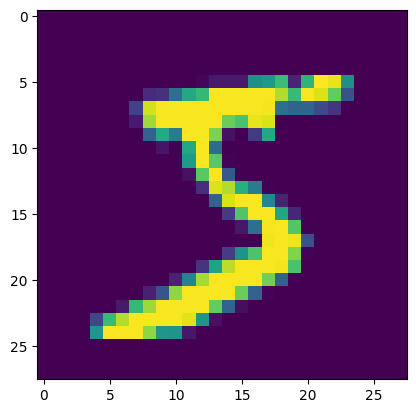

In [119]:
image , label = dataset[0] # Image is the image   label is the number
plt.imshow(image)
print('Label:' , label)
# print('shape' , image.shape) # we can not make the shape for the images without the tensor for the data

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
import torchvision.transforms as transforms

In [122]:
# MNIST dataset (images and labels)
dataset = MNIST(root = 'data/',
                train = True ,
                transform = transforms.ToTensor())
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [123]:
 img_tensor , label = dataset[0]
print(img_tensor.shape , label)

torch.Size([1, 28, 28]) 5


In [124]:
print(img_tensor[: , :,: ]) # the dieminsion is the color and height and wedith
print(torch.max(img_tensor) , torch.min(img_tensor)) # 1 present the white and zero is the black

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

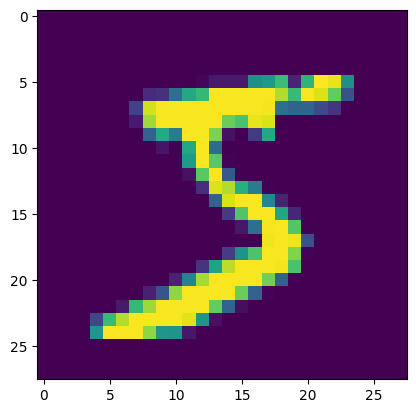

In [125]:
# Plot the image by p0assing in the 28 X 28 matrix
plt.imshow(img_tensor[0] )

#### Traidning and validation and test
* Training data - used to train the model compute the loss and adjust the weights of thbe model using gradient descent .
* Validation set - used to evaluate the model while training and adjust the hyperprameter to get the best model in terms of thed lr and epochs .
* Test used to report the final accuracy of the model.

In [126]:
import numpy as np

def split_indices(n ,  val_pct):
  # Determain size of validation
  n_val = int(val_pct*n)
  # Create random permutation of 0 to n-1
  idxs = np.random.permutation(n)
  # Pick first n_val indices for the validation set
  return idxs[n_val:] , idxs[:n_val] # train test


In [127]:
n = 60000
val_pct = 0.1

n_val = int(val_pct * n)
idxs = np.random.permutation(n)
len(idxs)

train = idxs[n_val:]
test = idxs[:n_val]
len(train) , len(test)

(54000, 6000)

In [128]:
train_indices , val_indices = split_indices(len(dataset) , val_pct = 0.2)


In [129]:
print(len(train_indices) , len(val_indices))
print('Sample val indices:' , val_indices[:20])


48000 12000
Sample val indices: [20599 50505 25657 49438 15614 14703  2867 22873 35353 40079 33770 42548
  5594 40293 41797 13435 16798  5173 38269 25135]


In [130]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [131]:
batch_size = 100  # reduce memory usage and speed up the training process.

# Training sampleer anmd the data loader
train_sampler = SubsetRandomSampler(train_indices) # using to shuffle the dataset
train_loader = DataLoader(dataset ,  # build in class provide flixebl data to the  model to do the training process
                          batch_size,
                          sampler = train_sampler
                          )


# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset ,
                        batch_size ,
                        sampler = val_sampler
                        )

In [132]:
len(train_loader)

480

### Logastic regression

In [133]:
import torch.nn as nn

input_size = 28*28 # the input is 784
num_classes = 10 # the ouput is 10


# Logistic regression model
model = nn.Linear(input_size , num_classes) # this model can not work we need to get flatten to the neural net

In [134]:
len(model.weight)

10

In [135]:
len(model.bias)

10

In [136]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size , num_classes)


  def forward(self , xb):
    xb = xb.reshape(-1 , 784)

    out = self.linear(xb)
    return out # , xb.shape

model = MnistModel()

In [137]:
# The snswer is to reshape the dataset
for images , labels in train_loader:
  # print(labels)
  print(images.shape)
  outputs = model(images)
  break
print(outputs.shape) # 100 is inputs and 10 is the output
print('sample outputs :\n' , outputs[:].data) # msut the summition of all the values sum up to one and the range between 0 and 1

torch.Size([100, 1, 28, 28])
torch.Size([100, 10])
sample outputs :
 tensor([[ 3.8291e-02, -9.6280e-02, -5.7963e-02,  2.4324e-01, -8.5722e-02,
          1.5164e-01, -1.1515e-01, -2.6255e-01, -2.4019e-01,  6.4689e-02],
        [-6.8293e-02,  1.5625e-01, -8.5187e-02, -5.0247e-02, -2.9751e-02,
         -3.1925e-02,  1.2004e-01, -2.5937e-02,  2.6267e-01,  9.7952e-02],
        [ 3.1909e-02, -1.5611e-01, -3.2358e-01,  9.7568e-02,  1.4631e-01,
         -2.8334e-02, -1.3281e-01,  5.4909e-02,  5.2678e-02,  2.8005e-02],
        [ 9.8668e-02,  6.4150e-02, -5.8989e-02,  8.2016e-02,  1.5378e-01,
         -2.3959e-01,  3.6480e-01, -4.5518e-02,  2.1260e-01, -1.2825e-01],
        [-1.4780e-03,  2.8213e-01, -2.4362e-01,  4.3339e-02,  9.5685e-02,
         -1.1427e-01,  5.9807e-03, -4.3370e-02,  2.7398e-01,  8.6578e-02],
        [-1.5636e-01,  3.8225e-01, -9.2760e-02,  2.0146e-01, -7.6593e-02,
         -7.8282e-03, -2.7551e-01, -2.4692e-01, -4.3327e-02, -9.8672e-03],
        [ 2.1168e-01, -4.3818e-02, -4

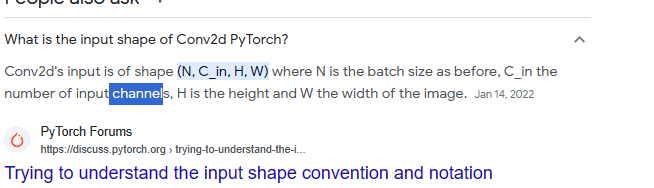

### SOFTMAX()

We use the softmax to get the probabilites to each value and return all .
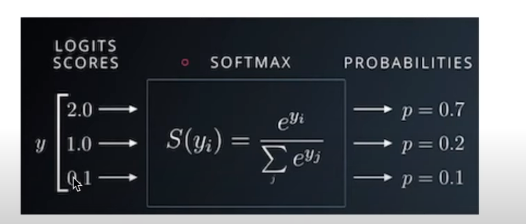

In [138]:
import torch.nn.functional as F

In [139]:
# Apply softmax for eachoutput row
probs = F.softmax(outputs , dim = 1 )


# Look at sample probabilites
print('Sample probabilites:\n',probs[:2].data)

# Add up the probabilites of an output row
print("Sum: " , torch.sum(probs[98]).item())

Sample probabilites:
 tensor([[0.1064, 0.0930, 0.0967, 0.1307, 0.0940, 0.1192, 0.0913, 0.0788, 0.0806,
         0.1093],
        [0.0897, 0.1122, 0.0882, 0.0913, 0.0932, 0.0930, 0.1082, 0.0935, 0.1248,
         0.1059]])
Sum:  1.0


In [140]:
# Get the max position and probabilites of the model

max_probs , preds = torch.max(probs , dim = 1)
print(preds)
print(max_probs)

tensor([3, 8, 4, 6, 1, 1, 4, 4, 5, 6, 3, 6, 4, 6, 3, 4, 6, 3, 8, 3, 3, 6, 3, 1,
        7, 6, 8, 4, 3, 4, 8, 3, 3, 0, 8, 6, 3, 1, 3, 3, 3, 6, 1, 6, 6, 3, 6, 3,
        8, 8, 3, 4, 4, 3, 3, 4, 4, 7, 4, 0, 8, 3, 0, 4, 6, 3, 3, 3, 4, 3, 3, 3,
        3, 4, 8, 1, 7, 3, 8, 4, 3, 4, 3, 3, 6, 6, 4, 3, 8, 3, 3, 3, 8, 3, 3, 3,
        6, 3, 3, 4])
tensor([0.1307, 0.1248, 0.1174, 0.1351, 0.1261, 0.1486, 0.1328, 0.1356, 0.1127,
        0.1352, 0.1264, 0.1259, 0.1282, 0.1247, 0.1369, 0.1524, 0.1250, 0.1483,
        0.1447, 0.1500, 0.1460, 0.1283, 0.1510, 0.1328, 0.1331, 0.1204, 0.1381,
        0.1515, 0.1178, 0.1719, 0.1386, 0.1229, 0.1354, 0.1098, 0.1285, 0.1204,
        0.1248, 0.1325, 0.1284, 0.1274, 0.1117, 0.1188, 0.1371, 0.1189, 0.1172,
        0.1497, 0.1155, 0.1327, 0.1251, 0.1529, 0.1219, 0.1286, 0.1400, 0.1445,
        0.1340, 0.1631, 0.1562, 0.1218, 0.1529, 0.1318, 0.1208, 0.1408, 0.1235,
        0.1317, 0.1194, 0.1277, 0.1265, 0.1525, 0.1481, 0.1114, 0.1477, 0.1311,
        0.1199, 0.1

In [141]:
labels

tensor([7, 3, 1, 6, 0, 0, 5, 2, 9, 8, 0, 8, 0, 8, 8, 6, 0, 6, 3, 4, 8, 3, 8, 2,
        8, 1, 3, 3, 5, 6, 5, 1, 8, 8, 5, 0, 3, 3, 8, 1, 1, 2, 0, 1, 8, 2, 5, 1,
        5, 5, 4, 2, 6, 9, 9, 2, 6, 8, 0, 5, 0, 2, 1, 8, 5, 9, 4, 4, 2, 1, 0, 7,
        3, 0, 3, 0, 1, 4, 0, 3, 7, 0, 1, 1, 1, 6, 4, 5, 0, 8, 4, 2, 5, 7, 9, 6,
        1, 5, 9, 0])

In [142]:
#  class MnistModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.linear = nn.Linear(input_size , num_classes)


#   def forward(self , xb):
#     xb = xb.reshape(-1 , 784)

#     out = self.linear(xb)
#     return out # , xb.shape

# model = MnistModel()

In [143]:
print(model.linear.weight.shape , model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-1.1985e-02, -2.7364e-02,  1.6728e-02,  ..., -2.6093e-02,
           2.5054e-02,  2.6827e-02],
         [ 5.9432e-03, -1.9619e-02,  5.9212e-04,  ...,  1.6559e-02,
          -4.3488e-03,  4.0060e-03],
         [ 1.4347e-02,  2.4218e-02, -1.8800e-02,  ..., -2.9365e-02,
           2.2741e-02,  2.7586e-02],
         ...,
         [-1.8839e-02, -3.9921e-03, -2.2357e-02,  ...,  1.3803e-02,
          -6.8175e-03, -2.2706e-02],
         [ 5.7807e-03, -2.5522e-02,  1.9320e-02,  ...,  1.7776e-03,
           2.4682e-02, -5.4227e-05],
         [-3.0487e-02, -7.8764e-03, -2.9670e-02,  ..., -3.0807e-02,
          -2.3176e-02, -2.8391e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0230, -0.0022, -0.0008,  0.0072,  0.0260, -0.0157,  0.0083,  0.0027,
         -0.0316, -0.0193], requires_grad=True)]

In [144]:
print(len(model.linear.weight))

10


In [145]:
# Get the accuracy of the predictions
torch.sum(labels == preds).item() / len(labels)

0.05

In [146]:
def accuracy(l1 , l2):
  return torch.sum(l1 == l2).item() / len(l1)


accuracy(preds , labels)

0.05

In [147]:
# cross entropy is continous and differentiable function that also provides good feedback for incremental improvements in the model
# higher probabilites leads to the correct predictions
loss_fn  = F.cross_entropy


In [148]:
# Loss for current batch of data
loss = loss_fn(outputs , labels)
loss

tensor(2.3477, grad_fn=<NllLossBackward0>)

#### Optimizer

In [149]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters() , lr = learning_rate)

In [150]:
### Training the model
def loss_batch(model , loss_func , xb , yb , opt = None , metric = None):

  # Calculate loss
  preds = model(xb)
  loss = loss_func(preds , yb)

  if opt is not None:
    # Compute gradients
    loss.backward()
    # Update parameters
    opt.step()
    # Reset gradients
    opt.zero_grad()


  metric_result = None
  if metric is not None:
    # Compute the metric
    metric_result = metric(preds , yb)

  return loss.item() , len(xb) , metric_result

In [151]:
def evaluate(model , loss_fn , valid_dl , metric = None):

  with torch.no_grad(): # we don't need this  for the validation dataset just applied for the gradient descent
    results = [loss_batch(model , loss_fn , xb , yb , metric = metric)
    for xb , yb , in valid_dl]

    # Seprates the lossess , counts and metrics
    losses , nums , metrics = zip(*results) # we use zip to seprate to three list
    # Total size of the dataset
    total = np.sum(nums)  # Nums
    # Avg loss across batches
    avg_loss = np.sum(np.multiply(losses , nums)) / total # the nums of the data set
    avg_metric = None
    if metric is not None:
      # Acg of metric across batches
      avg_metric = np.sum(np.multiply(metrics , nums)) / total
  return avg_loss , total , avg_metric

In [152]:
def accuracy(outputs , labels):

  _ , preds = torch.max(outputs , dim = 1 ) # _ value , preds index
  return torch.sum(preds == labels).item() / len(preds)

In [153]:
val_loss , total , val_acc = evaluate(model , loss_fn , val_loader , metric = accuracy)
print('Loss: {:.4f}, total: {:.4f} , Accuracy: {:.4f}'.format(val_loss , total ,  val_acc))

Loss: 2.3263, total: 12000.0000 , Accuracy: 0.0833


* The cross entropy formula

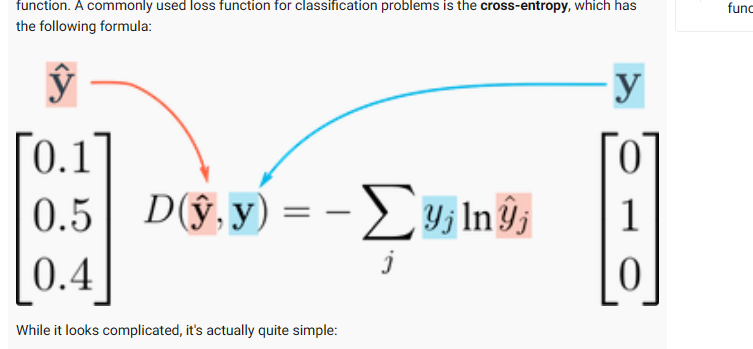

In [154]:
outputs

tensor([[ 3.8291e-02, -9.6280e-02, -5.7963e-02,  2.4324e-01, -8.5722e-02,
          1.5164e-01, -1.1515e-01, -2.6255e-01, -2.4019e-01,  6.4689e-02],
        [-6.8293e-02,  1.5625e-01, -8.5187e-02, -5.0247e-02, -2.9751e-02,
         -3.1925e-02,  1.2004e-01, -2.5937e-02,  2.6267e-01,  9.7952e-02],
        [ 3.1909e-02, -1.5611e-01, -3.2358e-01,  9.7568e-02,  1.4631e-01,
         -2.8334e-02, -1.3281e-01,  5.4909e-02,  5.2678e-02,  2.8005e-02],
        [ 9.8668e-02,  6.4150e-02, -5.8989e-02,  8.2016e-02,  1.5378e-01,
         -2.3959e-01,  3.6480e-01, -4.5518e-02,  2.1260e-01, -1.2825e-01],
        [-1.4780e-03,  2.8213e-01, -2.4362e-01,  4.3339e-02,  9.5685e-02,
         -1.1427e-01,  5.9807e-03, -4.3370e-02,  2.7398e-01,  8.6578e-02],
        [-1.5636e-01,  3.8225e-01, -9.2760e-02,  2.0146e-01, -7.6593e-02,
         -7.8282e-03, -2.7551e-01, -2.4692e-01, -4.3327e-02, -9.8672e-03],
        [ 2.1168e-01, -4.3818e-02, -4.1151e-01,  2.6626e-01,  3.2139e-01,
         -1.7374e-01, -9.1737e-0

In [155]:
loss_fn = F.cross_entropy

In [156]:
# Loss for current batch of the data
loss = loss_fn(outputs , labels)
print(loss)

tensor(2.3477, grad_fn=<NllLossBackward0>)


# The    nn.model is the logistic regression model

In [157]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history





In [158]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [209]:
import numpy as np

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.tensor(batch_losses  ).mean()  # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.tensor(batch_accs ).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [229]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 0.6995033621788025, 'val_acc': 0.8486666083335876}

In [230]:
history1 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6822, val_acc: 0.8502
Epoch [1], val_loss: 0.6666, val_acc: 0.8520
Epoch [2], val_loss: 0.6524, val_acc: 0.8540
Epoch [3], val_loss: 0.6394, val_acc: 0.8556
Epoch [4], val_loss: 0.6276, val_acc: 0.8570
Epoch [5], val_loss: 0.6166, val_acc: 0.8586
Epoch [6], val_loss: 0.6066, val_acc: 0.8597
Epoch [7], val_loss: 0.5972, val_acc: 0.8611
Epoch [8], val_loss: 0.5885, val_acc: 0.8627
Epoch [9], val_loss: 0.5804, val_acc: 0.8638


In [231]:
history3 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5727, val_acc: 0.8646
Epoch [1], val_loss: 0.5656, val_acc: 0.8657
Epoch [2], val_loss: 0.5589, val_acc: 0.8667
Epoch [3], val_loss: 0.5526, val_acc: 0.8675
Epoch [4], val_loss: 0.5466, val_acc: 0.8688
Epoch [5], val_loss: 0.5409, val_acc: 0.8692
Epoch [6], val_loss: 0.5356, val_acc: 0.8697
Epoch [7], val_loss: 0.5305, val_acc: 0.8707
Epoch [8], val_loss: 0.5256, val_acc: 0.8711
Epoch [9], val_loss: 0.5210, val_acc: 0.8721


In [245]:
history4 = fit(20, 0.003, model, train_loader, val_loader)

Epoch [0], val_loss: 0.3600, val_acc: 0.9013
Epoch [1], val_loss: 0.3590, val_acc: 0.9016
Epoch [2], val_loss: 0.3581, val_acc: 0.9016
Epoch [3], val_loss: 0.3571, val_acc: 0.9019
Epoch [4], val_loss: 0.3562, val_acc: 0.9019
Epoch [5], val_loss: 0.3554, val_acc: 0.9018
Epoch [6], val_loss: 0.3545, val_acc: 0.9021
Epoch [7], val_loss: 0.3536, val_acc: 0.9027
Epoch [8], val_loss: 0.3529, val_acc: 0.9027
Epoch [9], val_loss: 0.3521, val_acc: 0.9030
Epoch [10], val_loss: 0.3513, val_acc: 0.9032
Epoch [11], val_loss: 0.3505, val_acc: 0.9033
Epoch [12], val_loss: 0.3498, val_acc: 0.9035
Epoch [13], val_loss: 0.3491, val_acc: 0.9037
Epoch [14], val_loss: 0.3484, val_acc: 0.9037
Epoch [15], val_loss: 0.3477, val_acc: 0.9038
Epoch [16], val_loss: 0.3470, val_acc: 0.9036
Epoch [17], val_loss: 0.3464, val_acc: 0.9038
Epoch [18], val_loss: 0.3457, val_acc: 0.9041
Epoch [19], val_loss: 0.3450, val_acc: 0.9045


### this for the accuracy

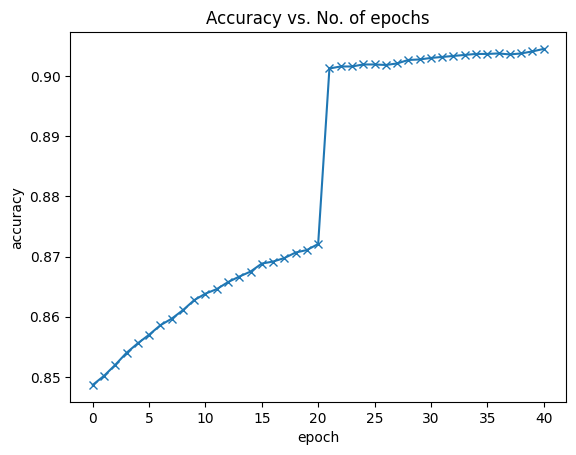

In [246]:
history = [result0] + history1 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# The loss function

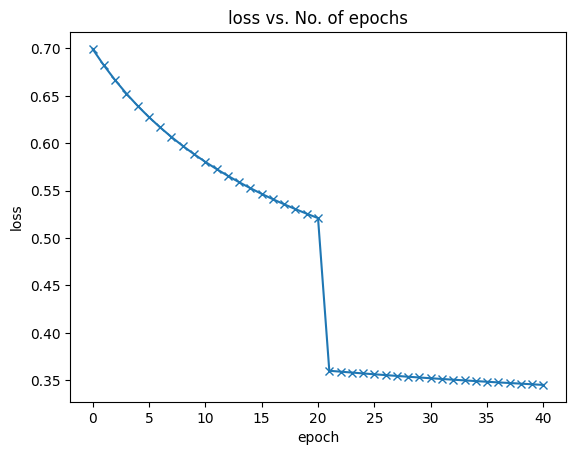

In [247]:
history = [result0] + history1 + history3 + history4
accuracies = [result['val_loss'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs. No. of epochs');

# Using the test data

In [248]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


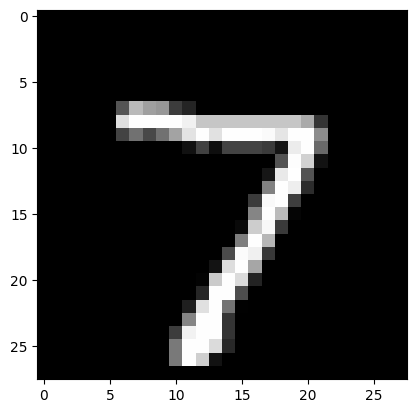

In [249]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray') # img is 28 * 28 thats why will we use the unsqueezed
print('Shape:', img.shape)
print('Label:', label)

In [250]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


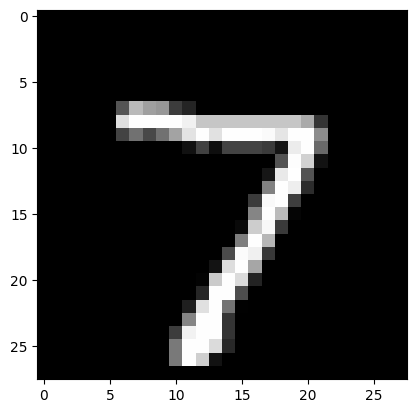

In [251]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


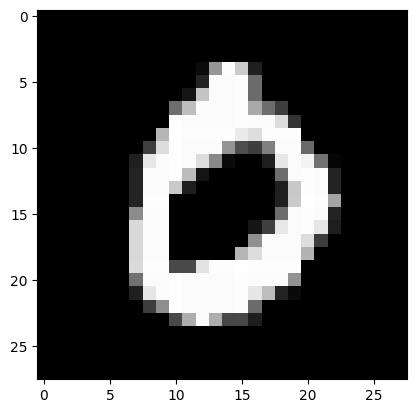

In [252]:
img, label = test_dataset[3]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 6 , Predicted: 6


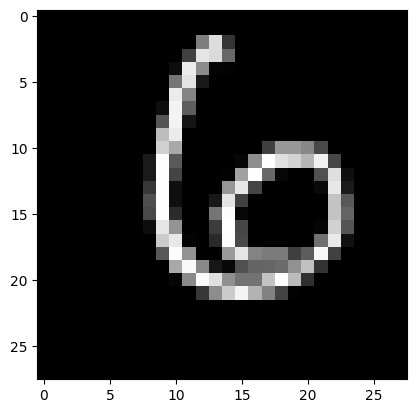

In [253]:
img, label = test_dataset[100]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 4 , Predicted: 4


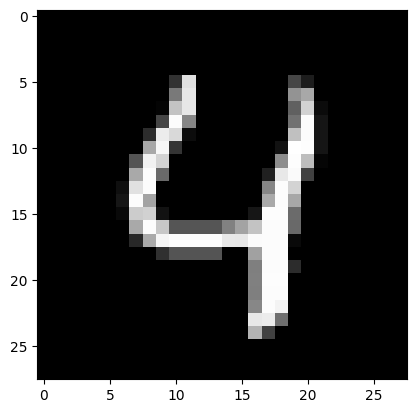

In [254]:
img, label = test_dataset[4]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


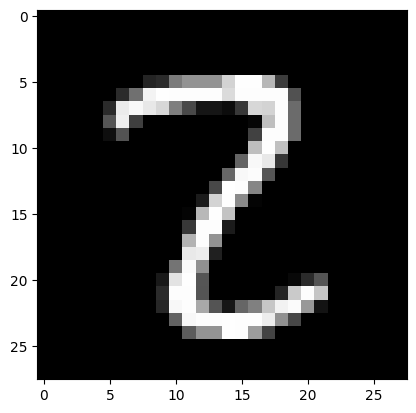

In [255]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))